In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report

In [2]:
df = pd.read_csv('df2.csv')
df

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,fico_range_low,fico_range_high,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_fico_range_high,last_fico_range_low,is_delinquent
0,218963,8800.0,8800.0,8800.00,15.61,307.70,30000.0,680.0,684.0,3677.140000,3677.14,2492.02,1185.12,574.0,570.0,1
1,1086540,17300.0,17300.0,17300.00,21.48,472.71,28080.0,675.0,679.0,15449.750000,15449.75,7248.86,8200.89,499.0,0.0,1
2,1105313,16800.0,16800.0,16800.00,19.48,440.26,80000.0,695.0,699.0,1815.580000,1815.58,686.65,1128.93,619.0,615.0,1
3,1053847,16000.0,16000.0,16000.00,5.32,481.84,85000.0,750.0,754.0,7653.180000,7653.18,5486.21,776.97,549.0,545.0,1
4,175573,10000.0,10000.0,9875.00,12.29,333.53,35035.0,680.0,684.0,5374.810000,5307.62,3987.91,1386.90,569.0,565.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,55427,4000.0,4000.0,4000.00,7.89,125.15,58500.0,750.0,754.0,4243.910000,4243.91,4000.00,243.91,759.0,755.0,0
299996,1947411,10000.0,10000.0,10000.00,13.99,341.73,75000.0,660.0,664.0,10487.871040,10487.87,10000.00,487.87,689.0,685.0,0
299997,1634396,6000.0,6000.0,5991.13,6.17,183.00,54000.0,740.0,744.0,6359.485695,6348.82,6000.00,359.49,779.0,775.0,0
299998,248234,10000.0,10000.0,10000.00,8.18,314.20,32000.0,685.0,689.0,11302.105623,11302.11,10000.00,1302.11,699.0,695.0,0


In [3]:
df1 = df
df1

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,fico_range_low,fico_range_high,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_fico_range_high,last_fico_range_low,is_delinquent
0,218963,8800.0,8800.0,8800.00,15.61,307.70,30000.0,680.0,684.0,3677.140000,3677.14,2492.02,1185.12,574.0,570.0,1
1,1086540,17300.0,17300.0,17300.00,21.48,472.71,28080.0,675.0,679.0,15449.750000,15449.75,7248.86,8200.89,499.0,0.0,1
2,1105313,16800.0,16800.0,16800.00,19.48,440.26,80000.0,695.0,699.0,1815.580000,1815.58,686.65,1128.93,619.0,615.0,1
3,1053847,16000.0,16000.0,16000.00,5.32,481.84,85000.0,750.0,754.0,7653.180000,7653.18,5486.21,776.97,549.0,545.0,1
4,175573,10000.0,10000.0,9875.00,12.29,333.53,35035.0,680.0,684.0,5374.810000,5307.62,3987.91,1386.90,569.0,565.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,55427,4000.0,4000.0,4000.00,7.89,125.15,58500.0,750.0,754.0,4243.910000,4243.91,4000.00,243.91,759.0,755.0,0
299996,1947411,10000.0,10000.0,10000.00,13.99,341.73,75000.0,660.0,664.0,10487.871040,10487.87,10000.00,487.87,689.0,685.0,0
299997,1634396,6000.0,6000.0,5991.13,6.17,183.00,54000.0,740.0,744.0,6359.485695,6348.82,6000.00,359.49,779.0,775.0,0
299998,248234,10000.0,10000.0,10000.00,8.18,314.20,32000.0,685.0,689.0,11302.105623,11302.11,10000.00,1302.11,699.0,695.0,0


In [4]:
df1.drop(columns='Unnamed: 0', inplace=True)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             300000 non-null  float64
 1   funded_amnt           300000 non-null  float64
 2   funded_amnt_inv       300000 non-null  float64
 3   int_rate              300000 non-null  float64
 4   installment           300000 non-null  float64
 5   annual_inc            300000 non-null  float64
 6   fico_range_low        300000 non-null  float64
 7   fico_range_high       300000 non-null  float64
 8   total_pymnt           300000 non-null  float64
 9   total_pymnt_inv       300000 non-null  float64
 10  total_rec_prncp       300000 non-null  float64
 11  total_rec_int         300000 non-null  float64
 12  last_fico_range_high  300000 non-null  float64
 13  last_fico_range_low   300000 non-null  float64
 14  is_delinquent         300000 non-null  int64  
dtype

In [6]:
# Separate data into feature and target DataFrames
X = df1.drop('is_delinquent', axis = 1)
y = df1['is_delinquent']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                   random_state=1)
# Scale the data for modeling
cred_scaler = StandardScaler()
cred_scaler.fit(X_train)
X_train_sc = cred_scaler.transform(X_train)
X_test_sc = cred_scaler.transform(X_test)

# Train a logistic regresssion model with the train data
cred_model = LogisticRegression(random_state=42)
cred_model.fit(X_train_sc, y_train)

/Users/ec/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [7]:
cred_model.coef_

array([[ 4.66354435e+00,  2.18395346e+01,  1.96236097e+01,
        -3.14661848e-01,  3.42357012e+00, -6.46073137e-02,
         3.56690270e-02,  3.53617063e-02, -1.21055304e+01,
        -1.36785659e+01, -2.97652408e+01,  7.72765208e+00,
        -1.46012861e+00, -2.82934603e-02]])

In [8]:
cred_model.score(X_test_sc, y_test)

0.9969466666666666

## Lets checkout the confusion matrix

In [9]:
y_pred = cred_model.predict(X_test_sc)
cm_1 = confusion_matrix(y_test, y_pred)
cm_1

array([[49864,     9],
       [  220, 24907]])

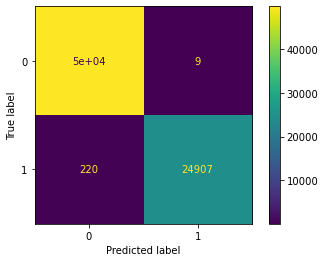

In [10]:
# More visual representation
plot_confusion_matrix(cred_model, X_test_sc, y_test);

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49873
           1       1.00      0.99      1.00     25127

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000



In [12]:
X.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'fico_range_low', 'fico_range_high',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_fico_range_high', 'last_fico_range_low'],
      dtype='object')